In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib


In [2]:
import yfinance as yf

data = yf.download("TCS.NS", start="2004-01-01", end="2024-11-01", interval="1d")

data.head()


C:\Users\prem modi\AppData\Local\Temp\ipykernel_3260\1644793447.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TCS.NS", start="2004-01-01", end="2024-11-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2004-01-01,25.428503,25.428503,25.428503,25.428503,0
2004-01-02,25.428503,25.428503,25.428503,25.428503,0
2004-01-05,25.428503,25.428503,25.428503,25.428503,0
2004-01-06,25.428503,25.428503,25.428503,25.428503,0
2004-01-07,25.428503,25.428503,25.428503,25.428503,0


In [3]:
data['daily_return'] = (data['Close'] - data['Open']) / data['Open'] * 100
data

Price,Close,High,Low,Open,Volume,daily_return
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,
Date,,,,,,
2004-01-01,25.428503,25.428503,25.428503,25.428503,0,0.000000
2004-01-02,25.428503,25.428503,25.428503,25.428503,0,0.000000
2004-01-05,25.428503,25.428503,25.428503,25.428503,0,0.000000
2004-01-06,25.428503,25.428503,25.428503,25.428503,0,0.000000
2004-01-07,25.428503,25.428503,25.428503,25.428503,0,0.000000
...,...,...,...,...,...,...
2024-10-25,3921.154785,3954.446695,3897.140028,3920.671593,1759676,0.012324
2024-10-28,3953.335693,3995.035107,3914.825161,3932.171723,1532534,0.538226


In [4]:
data.columns = data.columns.get_level_values(0)
data.head()

Price,Close,High,Low,Open,Volume,daily_return
Date,,,,,,
2004-01-01,25.428503,25.428503,25.428503,25.428503,0,0.0
2004-01-02,25.428503,25.428503,25.428503,25.428503,0,0.0
2004-01-05,25.428503,25.428503,25.428503,25.428503,0,0.0
2004-01-06,25.428503,25.428503,25.428503,25.428503,0,0.0
2004-01-07,25.428503,25.428503,25.428503,25.428503,0,0.0


In [5]:
print(data.dtypes)

Price
Close           float64
High            float64
Low             float64
Open            float64
Volume            int64
daily_return    float64
dtype: object


In [6]:
print(data.shape)
print(data.index.min(), "to", data.index.max())


(5155, 6)
2004-01-01 00:00:00 to 2024-10-31 00:00:00


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5155 entries, 2004-01-01 to 2024-10-31
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         5155 non-null   float64
 1   High          5155 non-null   float64
 2   Low           5155 non-null   float64
 3   Open          5155 non-null   float64
 4   Volume        5155 non-null   int64  
 5   daily_return  5155 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 281.9 KB


In [8]:
data.describe()

Price,Close,High,Low,Open,Volume,daily_return
count,5155.000000,5155.000000,5155.000000,5155.000000,5.155000e+03,5155.000000
mean,1171.264816,1183.522879,1159.296698,1171.701779,3.364960e+06,-0.062660
std,1151.385097,1161.680831,1141.460809,1151.654959,3.112829e+06,1.823662
min,25.428503,25.428503,25.428503,25.428503,0.000000e+00,-17.581542
25%,198.565369,201.884786,195.158247,198.729054,1.784699e+06,-0.982798
50%,859.461487,868.368609,849.656466,858.359351,2.611752e+06,-0.038131
75%,1789.908020,1814.731848,1766.603144,1797.084405,4.052070e+06,0.827413
max,4389.965820,4427.081095,4349.717095,4411.415210,8.806715e+07,12.483143


In [9]:
data.isnull().sum()

Price
Close           0
High            0
Low             0
Open            0
Volume          0
daily_return    0
dtype: int64

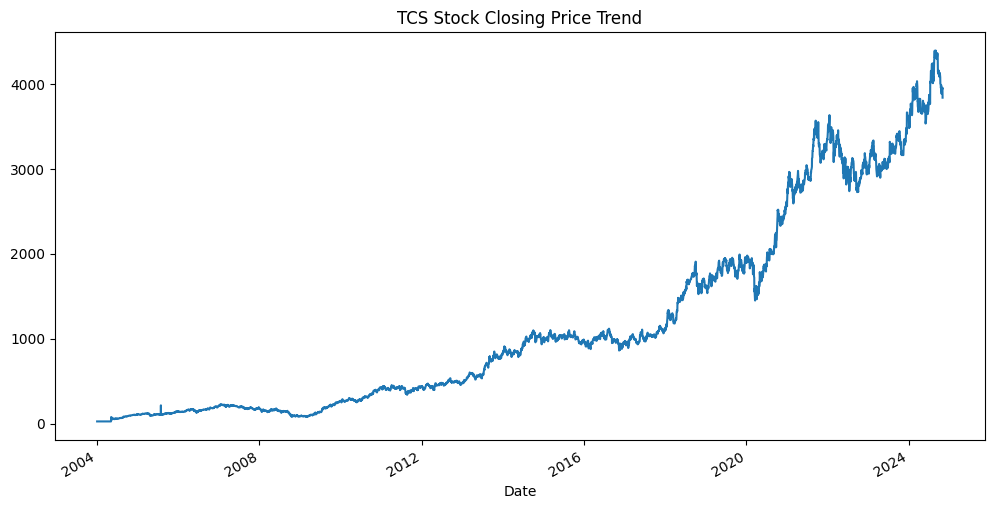

In [10]:
data['Close'].plot(figsize=(12,6))
plt.title("TCS Stock Closing Price Trend")
plt.show()

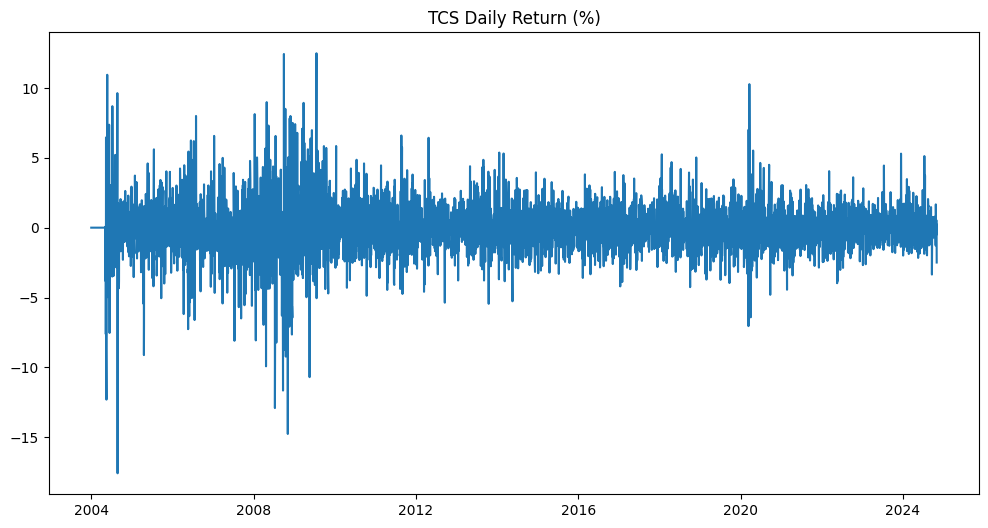

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data['daily_return'])
plt.title("TCS Daily Return (%)")
plt.show()


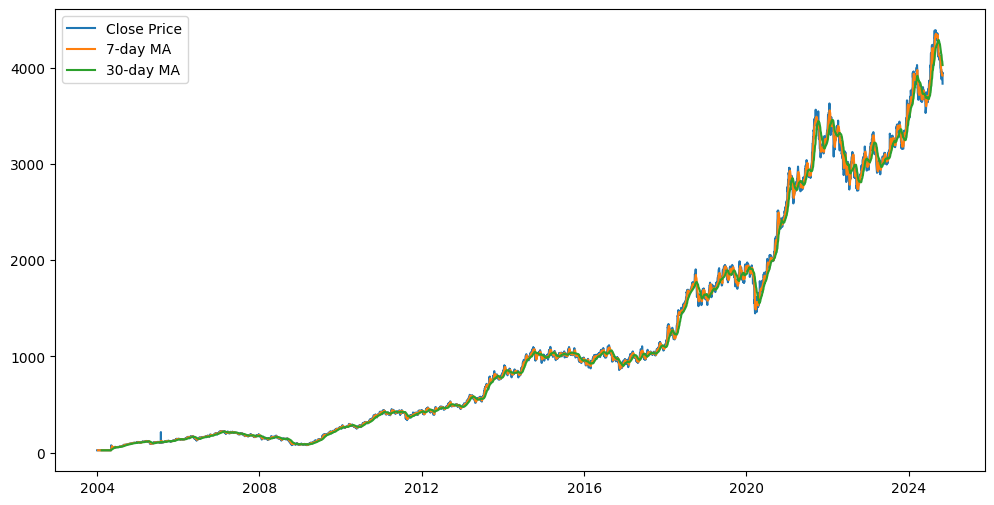

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Close'].rolling(7).mean(), label='7-day MA')
plt.plot(data['Close'].rolling(30).mean(), label='30-day MA')
plt.legend()
plt.show()


In [13]:
# 7-day and 30-day moving averages
data['MA_7'] = data['Close'].rolling(window=7).mean()
data['MA_30'] = data['Close'].rolling(window=30).mean()

# Rolling volatility (standard deviation of returns)
data['volatility_7'] = data['daily_return'].rolling(window=7).std()
data['volatility_30'] = data['daily_return'].rolling(window=30).std()

data.fillna(0)



Price,Close,High,Low,Open,Volume,daily_return,MA_7,MA_30,volatility_7,volatility_30
Date,,,,,,,,,,
2004-01-01,25.428503,25.428503,25.428503,25.428503,0,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-02,25.428503,25.428503,25.428503,25.428503,0,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-05,25.428503,25.428503,25.428503,25.428503,0,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-06,25.428503,25.428503,25.428503,25.428503,0,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-07,25.428503,25.428503,25.428503,25.428503,0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-10-25,3921.154785,3954.446695,3897.140028,3920.671593,1759676,0.012324,3933.062186,4080.703638,1.131186,0.971921
2024-10-28,3953.335693,3995.035107,3914.825161,3932.171723,1532534,0.538226,3931.937047,4067.150309,1.134800,0.981635
2024-10-29,3938.259766,3965.560137,3923.619130,3958.167387,1445885,-0.502950,3925.337995,4053.394906,1.131483,0.983082


In [14]:
data = data.dropna().copy()

In [15]:
data.isnull().sum()

Price
Close            0
High             0
Low              0
Open             0
Volume           0
daily_return     0
MA_7             0
MA_30            0
volatility_7     0
volatility_30    0
dtype: int64

In [16]:
data.head()

Price,Close,High,Low,Open,Volume,daily_return,MA_7,MA_30,volatility_7,volatility_30
Date,,,,,,,,,,
2004-02-11,25.428503,25.428503,25.428503,25.428503,0,0.0,25.428503,25.428503,0.0,0.0
2004-02-12,25.428503,25.428503,25.428503,25.428503,0,0.0,25.428503,25.428503,0.0,0.0
2004-02-13,25.428503,25.428503,25.428503,25.428503,0,0.0,25.428503,25.428503,0.0,0.0
2004-02-16,25.428503,25.428503,25.428503,25.428503,0,0.0,25.428503,25.428503,0.0,0.0
2004-02-17,25.428503,25.428503,25.428503,25.428503,0,0.0,25.428503,25.428503,0.0,0.0


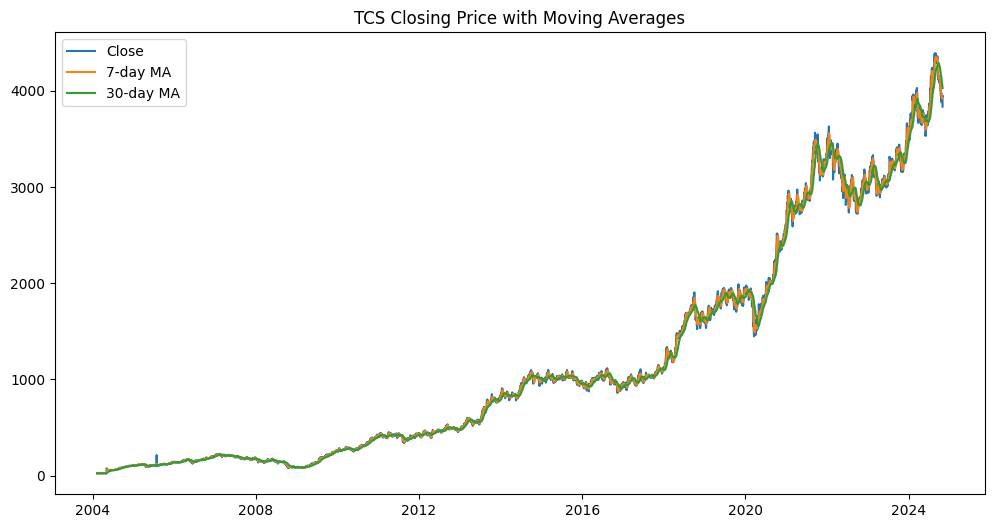

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA_7'], label='7-day MA')
plt.plot(data['MA_30'], label='30-day MA')
plt.title('TCS Closing Price with Moving Averages')
plt.legend()
plt.show()


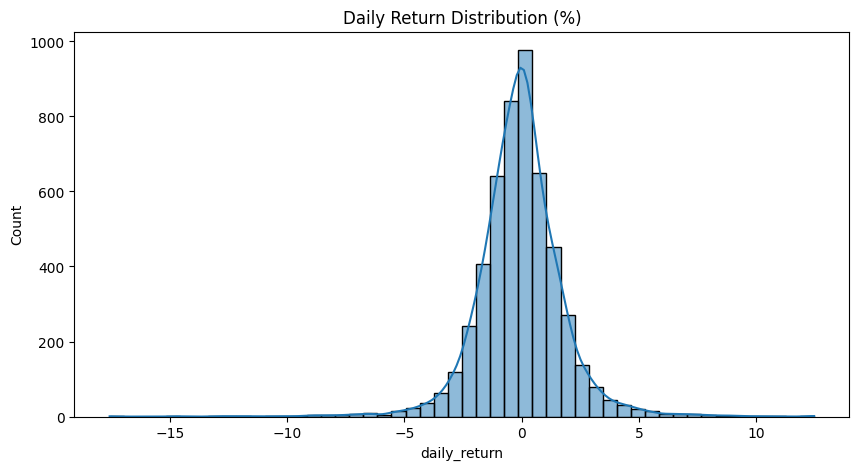

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data['daily_return'].dropna(), bins=50, kde=True)
plt.title('Daily Return Distribution (%)')
plt.show()


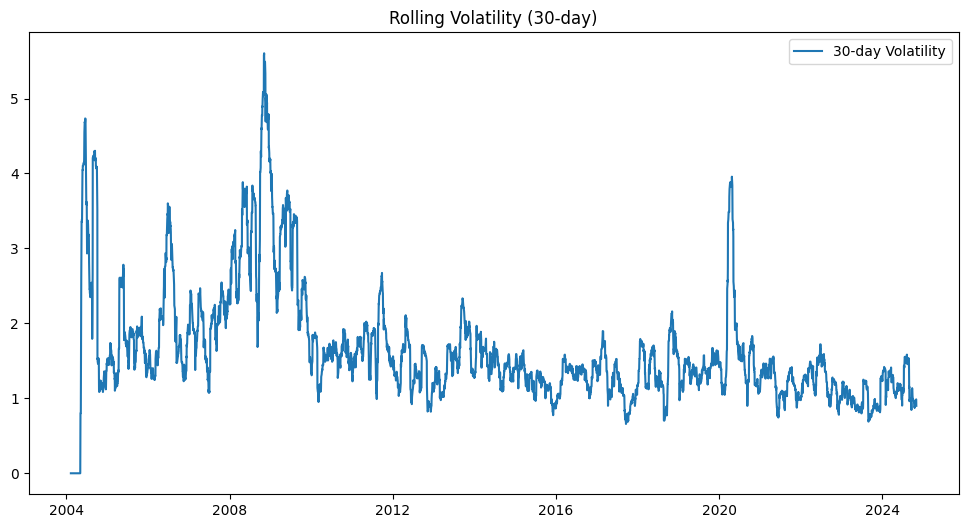

In [19]:
plt.figure(figsize=(12,6))
plt.plot(data['volatility_30'], label='30-day Volatility')
plt.title('Rolling Volatility (30-day)')
plt.legend()
plt.show()


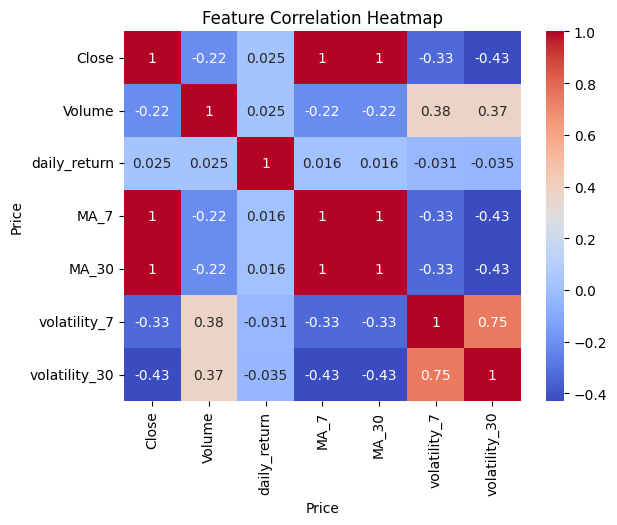

In [20]:
corr = data[['Close','Volume','daily_return','MA_7','MA_30','volatility_7','volatility_30']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [21]:
data['target'] = data['Close'].shift(-1)
data = data.dropna()


In [22]:
features = ['Close','MA_7','MA_30','volatility_7','volatility_30','Volume']
X = data[features]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 1852.3075978428117
R²: 0.9908791350331838


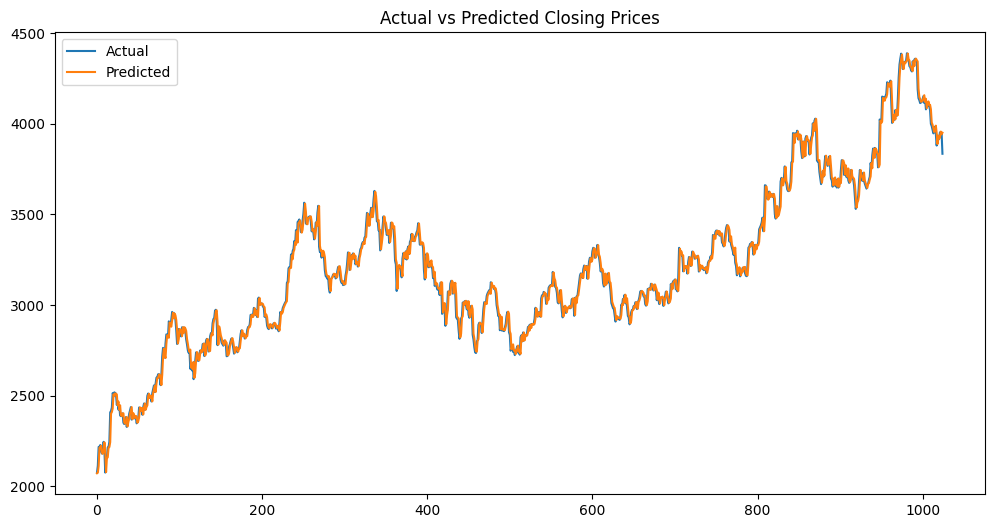

In [25]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()


In [26]:
data['lag_1'] = data['Close'].shift(1)
data['lag_7'] = data['Close'].shift(7)
data['lag_30'] = data['Close'].shift(30)
data.fillna(0)

Price,Close,High,Low,Open,Volume,daily_return,MA_7,MA_30,volatility_7,volatility_30,target,lag_1,lag_7,lag_30
Date,,,,,,,,,,,,,,
2004-02-11,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,25.428503,0.000000,0.000000,0.000000
2004-02-12,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,25.428503,25.428503,0.000000,0.000000
2004-02-13,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,25.428503,25.428503,0.000000,0.000000
2004-02-16,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,25.428503,25.428503,0.000000,0.000000
2004-02-17,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,25.428503,25.428503,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,3911.829346,3941.884010,3869.405143,3869.405143,2676744,1.096401,3936.849644,4095.172225,1.130249,0.973561,3921.154785,3929.562500,3968.730713,4318.241211
2024-10-25,3921.154785,3954.446695,3897.140028,3920.671593,1759676,0.012324,3933.062186,4080.703638,1.131186,0.971921,3953.335693,3911.829346,3947.666992,4355.212402
2024-10-28,3953.335693,3995.035107,3914.825161,3932.171723,1532534,0.538226,3931.937047,4067.150309,1.134800,0.981635,3938.259766,3921.154785,3961.211670,4359.935547


In [27]:
data['pct_change'] = data['Close'].pct_change()
data['rolling_mean_90'] = data['Close'].rolling(90).mean()
data['rolling_std_90'] = data['Close'].rolling(90).std()


In [28]:
predictions = pd.DataFrame({
    'date': y_test.index,
	'predicted_close': y_pred,
	'actual_close': y_test.values
})

predictions['month'] = predictions['date'].dt.to_period('M')
monthly_forecast = predictions.groupby('month')['predicted_close'].mean().reset_index()


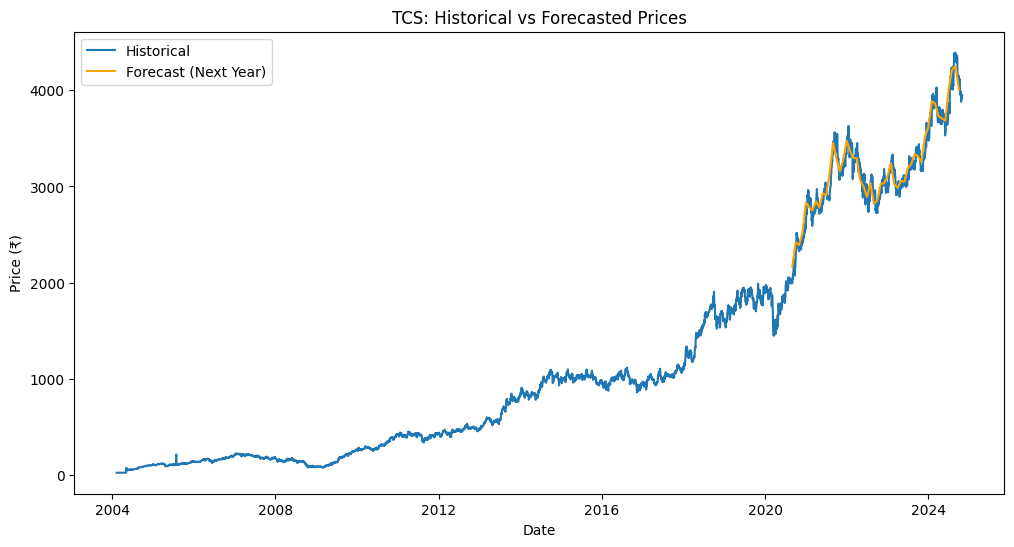

In [29]:
plt.figure(figsize=(12,6))

# Make sure both have datetime index or column
plt.plot(data.index, data['Close'], label='Historical')

# Convert forecast month to datetime for proper plotting
monthly_forecast['month'] = monthly_forecast['month'].dt.to_timestamp()

plt.plot(monthly_forecast['month'], monthly_forecast['predicted_close'], label='Forecast (Next Year)', color='orange')

plt.title('TCS: Historical vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend()
plt.show()


In [30]:
change = ((predictions.iloc[-1]['predicted_close'] - data['Close'].iloc[-1]) / data['Close'].iloc[-1]) * 100
print(f"Predicted change in 12 months: {change:.2f}%")


Predicted change in 12 months: 0.10%


In [31]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1)).ravel()

model.fit(X_scaled, y_scaled)
predictions_scaled = model.predict(scaler_X.transform(X_test))
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()


In [32]:
data['Return_1d'] = data['Close'].pct_change()
data['Return_7d'] = data['Close'].pct_change(7)
data['Momentum_7'] = data['Close'] / data['MA_7']
data['Momentum_30'] = data['Close'] / data['MA_30']


In [33]:
data['Target'] = data['Close'].shift(-1)


In [34]:
X = data.dropna()[['Close','MA_7','MA_30','volatility_7','volatility_30','Volume']]
y = data.dropna()['Target']


In [35]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 1852.31
MAE: 31.34


In [37]:
X_train.columns

Index(['Close', 'MA_7', 'MA_30', 'volatility_7', 'volatility_30', 'Volume'], dtype='object', name='Price')

In [38]:
last_row = X_test.iloc[-1].copy()
last_row = last_row[X_train.columns]  # make sure features match


In [39]:
future_predictions = []

for i in range(252):
    last_row = last_row[X_train.columns]

    pred = model.predict([last_row])[0]
    future_predictions.append(pred)

    # Update Close
    last_row['Close'] = pred

    # Update MAs and volatility realistically
    last_row['MA_7'] = last_row['MA_7'] * 0.85 + pred * 0.15
    last_row['MA_30'] = last_row['MA_30'] * 0.95 + pred * 0.05
    last_row['volatility_7'] = abs(pred - last_row['MA_7']) * 0.1
    last_row['volatility_30'] = abs(pred - last_row['MA_30']) * 0.05
    last_row['Volume'] *= np.random.uniform(0.98, 1.02)


c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\s

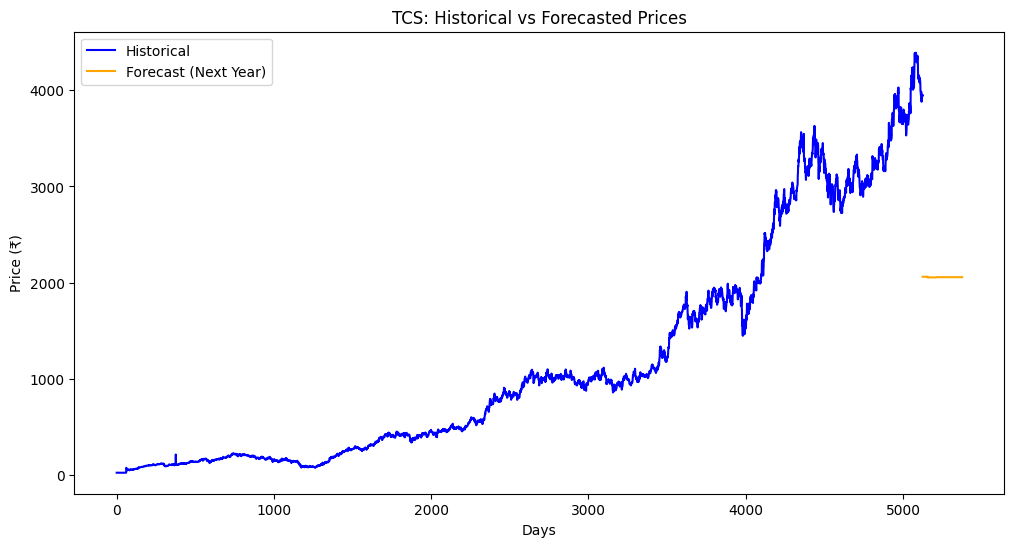

In [40]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'].values, label='Historical', color='blue')
plt.plot(range(len(data), len(data)+len(future_predictions)),
         future_predictions, label='Forecast (Next Year)', color='orange')
plt.legend()
plt.title("TCS: Historical vs Forecasted Prices")
plt.xlabel("Days")
plt.ylabel("Price (₹)")
plt.show()


In [41]:
print(future_predictions[:10])
print(future_predictions[-10:])
print(len(future_predictions))


[np.float64(2061.881001586914), np.float64(2061.926565551758), np.float64(2061.926565551758), np.float64(2061.926565551758), np.float64(2061.926565551758), np.float64(2061.926565551758), np.float64(2061.926565551758), np.float64(2061.926565551758), np.float64(2061.926565551758), np.float64(2061.926565551758)]
[np.float64(2057.393842163086), np.float64(2057.393842163086), np.float64(2057.393842163086), np.float64(2057.393842163086), np.float64(2057.2041369628905), np.float64(2057.393842163086), np.float64(2057.393842163086), np.float64(2057.2063647460936), np.float64(2057.393842163086), np.float64(2057.393842163086)]
252


In [42]:
last_row = X_test.iloc[-1].copy()
last_row = last_row[X_train.columns]


In [43]:
train = data[data.index <= '2024-10-31']
test = data[data.index > '2024-10-31']
X_train, y_train = train[features], train['Close']
X_test, y_test = test[features], test['Close']


In [44]:
lin_reg = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=200, random_state=42).fit(X_train, y_train)


In [45]:
split_point = int(len(data) * 0.9)
train = data.iloc[:split_point]
test = data.iloc[split_point:]


In [46]:
X_train, y_train = train[features], train['Close']
X_test, y_test = test[features], test['Close']


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
rf = RandomForestRegressor(n_estimators=200, random_state=42)

lin_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

lin_pred = lin_reg.predict(X_test)
rf_pred = rf.predict(X_test)


In [48]:
print(y_test.head())
print(lin_pred[:5])


Date
2022-09-30    2743.796387
2022-10-03    2725.897217
2022-10-04    2822.879639
2022-10-06    2832.742920
2022-10-07    2798.908936
Name: Close, dtype: float64
[2743.79638672 2725.8972168  2822.87963867 2832.74291992 2798.90893555]


In [49]:
models = {'Linear Regression' : lin_reg, 'Random forest' : rf}
models

{'Linear Regression': LinearRegression(),
 'Random forest': RandomForestRegressor(n_estimators=200, random_state=42)}

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

for name, pred in zip(['Linear Regression', 'Random Forest'], [lin_pred, rf_pred]):
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    print(f"{name} -> MSE: {mse:.2f}, MAE: {mae:.2f}")



Linear Regression -> MSE: 0.00, MAE: 0.00
Random Forest -> MSE: 59944.64, MAE: 126.26


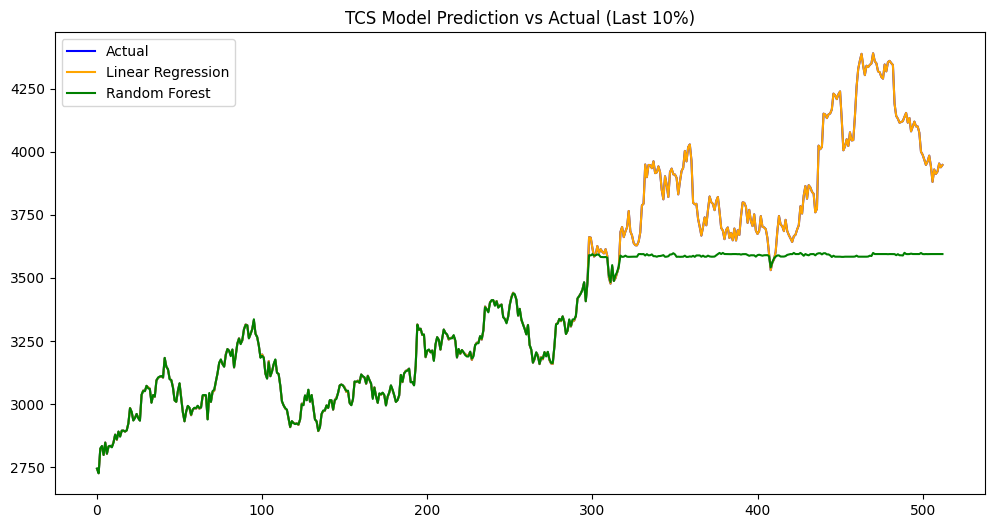

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(lin_pred, label='Linear Regression', color='orange')
plt.plot(rf_pred, label='Random Forest', color='green')
plt.legend()
plt.title("TCS Model Prediction vs Actual (Last 10%)")
plt.show()


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5125 entries, 2004-02-11 to 2024-10-30
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close            5125 non-null   float64
 1   High             5125 non-null   float64
 2   Low              5125 non-null   float64
 3   Open             5125 non-null   float64
 4   Volume           5125 non-null   int64  
 5   daily_return     5125 non-null   float64
 6   MA_7             5125 non-null   float64
 7   MA_30            5125 non-null   float64
 8   volatility_7     5125 non-null   float64
 9   volatility_30    5125 non-null   float64
 10  target           5125 non-null   float64
 11  lag_1            5124 non-null   float64
 12  lag_7            5118 non-null   float64
 13  lag_30           5095 non-null   float64
 14  pct_change       5124 non-null   float64
 15  rolling_mean_90  5036 non-null   float64
 16  rolling_std_90   5036 non-null   float64
 

In [53]:
# split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[features], data['Close'], test_size=0.1, shuffle=False
)

# retrain LR and RF
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# then evaluate and plot


In [54]:
print(features)

['Close', 'MA_7', 'MA_30', 'volatility_7', 'volatility_30', 'Volume']


In [55]:
print(data.index.is_monotonic_increasing)


True


In [56]:
data['log_Close'] = np.log(data['Close'])
data


Price,Close,High,Low,Open,Volume,daily_return,MA_7,MA_30,volatility_7,volatility_30,...,lag_30,pct_change,rolling_mean_90,rolling_std_90,Return_1d,Return_7d,Momentum_7,Momentum_30,Target,log_Close
Date,,,,,,,,,,,,,,,,,,,,,
2004-02-11,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,25.428503,3.235871
2004-02-12,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,...,NaN,0.000000,NaN,NaN,0.000000,NaN,1.000000,1.000000,25.428503,3.235871
2004-02-13,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,...,NaN,0.000000,NaN,NaN,0.000000,NaN,1.000000,1.000000,25.428503,3.235871
2004-02-16,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,...,NaN,0.000000,NaN,NaN,0.000000,NaN,1.000000,1.000000,25.428503,3.235871
2004-02-17,25.428503,25.428503,25.428503,25.428503,0,0.000000,25.428503,25.428503,0.000000,0.000000,...,NaN,0.000000,NaN,NaN,0.000000,NaN,1.000000,1.000000,25.428503,3.235871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,3911.829346,3941.884010,3869.405143,3869.405143,2676744,1.096401,3936.849644,4095.172225,1.130249,0.973561,...,4318.241211,-0.004513,4083.105168,208.510685,-0.004513,-0.014337,0.993645,0.955230,3921.154785,8.271760
2024-10-25,3921.154785,3954.446695,3897.140028,3920.671593,1759676,0.012324,3933.062186,4080.703638,1.131186,0.971921,...,4355.212402,0.002384,4085.902889,204.548423,0.002384,-0.006716,0.996972,0.960902,3953.335693,8.274141
2024-10-28,3953.335693,3995.035107,3914.825161,3932.171723,1532534,0.538226,3931.937047,4067.150309,1.134800,0.981635,...,4359.935547,0.008207,4089.201378,199.886170,0.008207,-0.001988,1.005442,0.972016,3938.259766,8.282315


In [57]:
data['Target'] = data['Close'].shift(-1) # Drop the log scale completely for now

features = ['MA_7', 'MA_30', 'volatility_7', 'volatility_30', 'Volume'] #Define features
data = data.dropna() #Keep only valid rows


In [58]:
split_point = int(len(data) * 0.9)
train = data.iloc[:split_point]
test = data.iloc[split_point:]

X_train, y_train = train[features], train['Target']
X_test, y_test = test[features], test['Target']

In [59]:

# Retrain Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
# Predict actual prices
lin_pred = lin_reg.predict(X_test)
rf_pred = rf.predict(X_test)
y_test_actual = y_test

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Close


In [ ]:
for name, pred in zip(['Linear Regression', 'Random Forest'], [lin_pred, rf_pred]):
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    print(f"{name} -> MSE: {mse:.2f}, MAE: {mae:.2f}")

Linear Regression -> MSE: 12040007.57, MAE: 3444.89
Random Forest -> MSE: 117168.97, MAE: 226.02


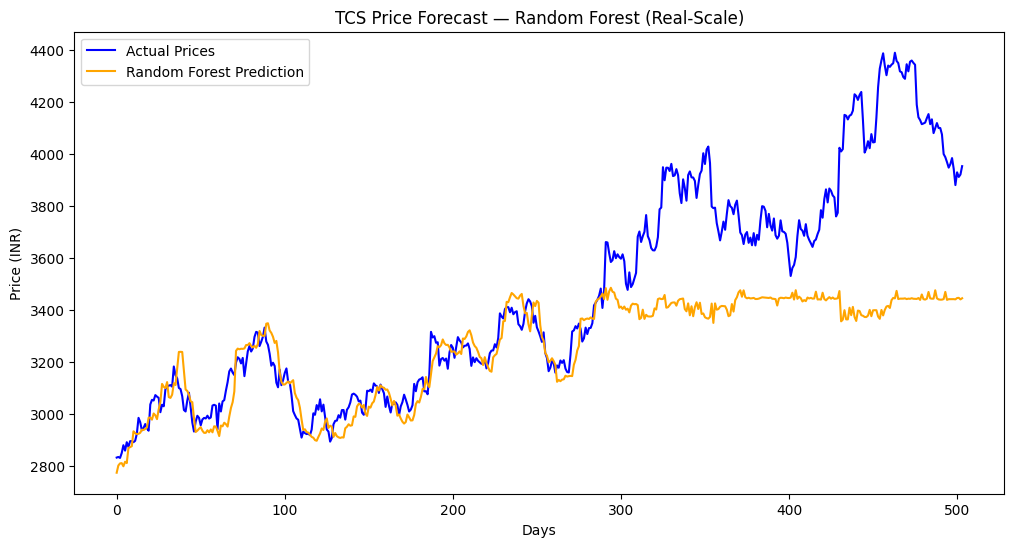

In [ ]:
# Plotlib as Log-Scaled Model

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual.values, label='Actual Prices', color='blue')
plt.plot(rf_pred, label='Random Forest Prediction', color='orange')
plt.title('TCS Price Forecast — Random Forest (Real-Scale)')
plt.xlabel('Days')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()



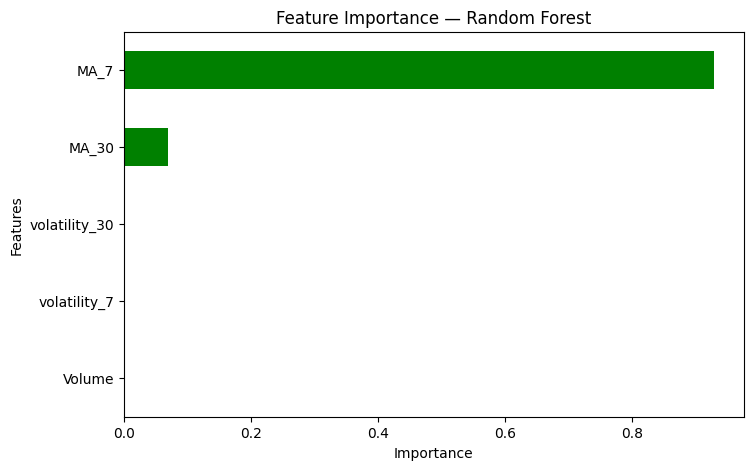

In [ ]:

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8,5))
feat_imp.plot(kind='barh', color='green')
plt.title("Feature Importance — Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
print("Model Evaluation Summary:")
print(f"Linear Regression -> MSE: {12040007.57:.2f}, MAE: {3444.89:.2f}")
print(f"Random Forest -> MSE: {117168.97:.2f}, MAE: {226.02:.2f}")

print("\nInterpretation:")
print("- Random Forest performed significantly better with lower MSE and MAE.")
print("- This means its predictions are much closer to actual prices on average.")
print("- Linear Regression failed to capture non-linear patterns in stock movements.")


Model Evaluation Summary:
Linear Regression -> MSE: 12040007.57, MAE: 3444.89
Random Forest -> MSE: 117168.97, MAE: 226.02

Interpretation:
- Random Forest performed significantly better with lower MSE and MAE.
- This means its predictions are much closer to actual prices on average.
- Linear Regression failed to capture non-linear patterns in stock movements.


In [ ]:
joblib.dump(rf, 'tcs_rf_model.pkl')
print("Model saved as tcs_rf_model.pkl")


Model saved as tcs_rf_model.pkl


In [ ]:
last_row = data.iloc[-1].copy() # Start with the last available record

future_predictions = []
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=252, freq='B')  # business days

In [ ]:
for date in future_dates:
    # Prepare input for prediction
    X_input = last_row[features].values.reshape(1, -1)
    next_price = rf.predict(X_input)[0]
    future_predictions.append(next_price)

    # Update the row for next iteration
    last_row['Close'] = next_price
    last_row['MA_7'] = (last_row['MA_7'] * 6 + next_price) / 7
    last_row['MA_30'] = (last_row['MA_30'] * 29 + next_price) / 30
    last_row['volatility_7'] = np.std(future_predictions[-7:]) if len(future_predictions) >= 7 else last_row['volatility_7']
    last_row['volatility_30'] = np.std(future_predictions[-30:]) if len(future_predictions) >= 30 else last_row['volatility_30']
    last_row['Volume'] *= np.random.uniform(0.98, 1.02)  # small volume variation


c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\prem modi\AppData\Local\Programs\Python\Python312\Lib\s

C:\Users\prem modi\AppData\Local\Temp\ipykernel_5588\2497589982.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_forecast = future_df.resample('M').mean()


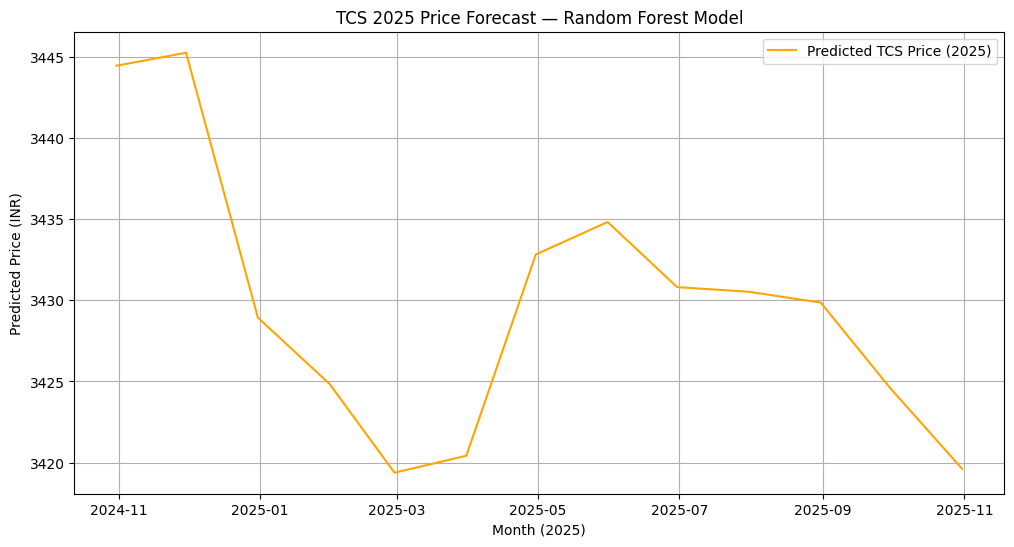

In [ ]:
# Create DataFrame for predictions
future_df = pd.DataFrame({
    'Date': future_dates, 
    'Predicted_Close': future_predictions
    })
future_df.set_index('Date', inplace=True)

# Resample to monthly averages
monthly_forecast = future_df.resample('M').mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_forecast.index, monthly_forecast['Predicted_Close'], color='orange', label='Predicted TCS Price (2025)')
plt.title("TCS 2025 Price Forecast — Random Forest Model")
plt.xlabel("Month (2025)")
plt.ylabel("Predicted Price (INR)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Show forecast data
print(monthly_forecast.head(12))

# Optional: save to CSV
monthly_forecast.to_csv('TCS_2025_Forecast.csv')


            Predicted_Close
Date                       
2024-10-31      3444.468849
2024-11-30      3445.269174
2024-12-31      3428.936528
2025-01-31      3424.841766
2025-02-28      3419.372833
2025-03-31      3420.421141
2025-04-30      3432.830800
2025-05-31      3434.832246
2025-06-30      3430.816238
2025-07-31      3430.530518
2025-08-31      3429.860578
2025-09-30      3424.589251
